## Rod Cutting Problem

In [26]:
from collections import defaultdict

In [90]:
from functools import lru_cache

In [27]:
prices = defaultdict(lambda : -float('inf'))

In [28]:
for i, v in enumerate([1, 5, 8, 9, 10, 17, 17, 20, 24, 30]):
    prices[i+1] = v

<img src="slide_01.png"></img>

In [154]:
import random

In [155]:
random_numbers = [(i, random.randint(-10, 20)) for i in range(10)]

In [158]:
random_numbers

[(0, -2),
 (1, -4),
 (2, -8),
 (3, 14),
 (4, -6),
 (5, 1),
 (6, 18),
 (7, -6),
 (8, -9),
 (9, 4)]

In [157]:
max(random_numbers, key=lambda x: x[1])

(6, 18)

In [159]:
solution = {}

@memo
def revenue(r):  
    split, r_star = max([(0, prices[r])] + [(i, revenue(i) + revenue(r-i)) for i in range(1, r)], key=lambda x: x[1])
    solution[r] = (split, r-split)
    return r_star

In [172]:
revenue(100)

300

In [173]:
solution

{1: (0, 1),
 2: (0, 2),
 3: (0, 3),
 4: (2, 2),
 5: (2, 3),
 6: (0, 6),
 7: (1, 6),
 8: (2, 6),
 9: (3, 6),
 10: (0, 10),
 11: (1, 10),
 12: (2, 10),
 13: (3, 10),
 14: (2, 12),
 15: (2, 13),
 16: (6, 10),
 17: (1, 16),
 18: (2, 16),
 19: (3, 16),
 20: (10, 10),
 21: (1, 20),
 22: (2, 20),
 23: (3, 20),
 24: (2, 22),
 25: (2, 23),
 26: (6, 20),
 27: (1, 26),
 28: (2, 26),
 29: (3, 26),
 30: (10, 20),
 31: (1, 30),
 32: (2, 30),
 33: (3, 30),
 34: (2, 32),
 35: (2, 33),
 36: (6, 30),
 37: (1, 36),
 38: (2, 36),
 39: (3, 36),
 40: (10, 30),
 41: (1, 40),
 42: (2, 40),
 43: (3, 40),
 44: (2, 42),
 45: (2, 43),
 46: (6, 40),
 47: (1, 46),
 48: (2, 46),
 49: (3, 46),
 50: (10, 40),
 51: (1, 50),
 52: (2, 50),
 53: (3, 50),
 54: (2, 52),
 55: (2, 53),
 56: (6, 50),
 57: (1, 56),
 58: (2, 56),
 59: (3, 56),
 60: (10, 50),
 61: (1, 60),
 62: (2, 60),
 63: (3, 60),
 64: (2, 62),
 65: (2, 63),
 66: (6, 60),
 67: (1, 66),
 68: (2, 66),
 69: (3, 66),
 70: (10, 60),
 71: (1, 70),
 72: (2, 70),
 73:

In [179]:
def parse_solution(r, revenue_solution):    
    left, right = revenue_solution[r]
    
    if left == 0: return [right]
    
    return [left] + parse_solution(right, revenue_solution)

In [176]:
def pretty_solution(splits):
    return ' -> '.join(map(str, splits))

pretty_solution(parse_solution(18, solution))

'2 -> 6 -> 10'

In [177]:
pretty_solution(parse_solution(57, solution))

'1 -> 6 -> 10 -> 10 -> 10 -> 10 -> 10'

In [178]:
solution

{1: (0, 1),
 2: (0, 2),
 3: (0, 3),
 4: (2, 2),
 5: (2, 3),
 6: (0, 6),
 7: (1, 6),
 8: (2, 6),
 9: (3, 6),
 10: (0, 10),
 11: (1, 10),
 12: (2, 10),
 13: (3, 10),
 14: (2, 12),
 15: (2, 13),
 16: (6, 10),
 17: (1, 16),
 18: (2, 16),
 19: (3, 16),
 20: (10, 10),
 21: (1, 20),
 22: (2, 20),
 23: (3, 20),
 24: (2, 22),
 25: (2, 23),
 26: (6, 20),
 27: (1, 26),
 28: (2, 26),
 29: (3, 26),
 30: (10, 20),
 31: (1, 30),
 32: (2, 30),
 33: (3, 30),
 34: (2, 32),
 35: (2, 33),
 36: (6, 30),
 37: (1, 36),
 38: (2, 36),
 39: (3, 36),
 40: (10, 30),
 41: (1, 40),
 42: (2, 40),
 43: (3, 40),
 44: (2, 42),
 45: (2, 43),
 46: (6, 40),
 47: (1, 46),
 48: (2, 46),
 49: (3, 46),
 50: (10, 40),
 51: (1, 50),
 52: (2, 50),
 53: (3, 50),
 54: (2, 52),
 55: (2, 53),
 56: (6, 50),
 57: (1, 56),
 58: (2, 56),
 59: (3, 56),
 60: (10, 50),
 61: (1, 60),
 62: (2, 60),
 63: (3, 60),
 64: (2, 62),
 65: (2, 63),
 66: (6, 60),
 67: (1, 66),
 68: (2, 66),
 69: (3, 66),
 70: (10, 60),
 71: (1, 70),
 72: (2, 70),
 73:

In [152]:
help(revenue)

Help on function revenue in module __main__:

revenue(r)
    Get the optimal revenue value of length r



In [151]:
revenue(101)

301

In [150]:
from functools import wraps

In [149]:
def memo(func):
    cache = {} 
    @wraps(func)
    def __wrap(*args, **kwargs):
        str_key = str(args) + str(kwargs)
        if str_key not in cache:
            result = func(*args, **kwargs)
            cache[str_key] = result
        return cache[str_key]
    return __wrap

In [120]:
@memo
def new_function(some_lst):
    return sum(some_lst)

In [121]:
new_function([1, 2, 3])

	hi, this is function: new_function


6

In [87]:
def print_hi(func):
    def _wrap(*args, **kwargs): 
        print('\tHi, I am function: {}'.format(func.__name__))
        return func(*args, **kwargs)
    return _wrap

In [88]:
@print_hi
def add(a, b): 
    return a + b

In [89]:
add(1, 10)

	Hi, I am function: add


11

In [37]:
import time

In [43]:
start = time.time()
revenue(30)
print('used time: {}'.format(time.time() - start))

revenue(1) is cached
revenue(1) is cached
revenue(1) is cached
revenue(1) is cached
revenue(1) is cached
revenue(1) is cached
revenue(1) is cached
revenue(1) is cached
revenue(1) is cached
revenue(1) is cached
revenue(1) is cached
revenue(1) is cached
revenue(1) is cached
revenue(1) is cached
revenue(1) is cached
revenue(15) is cached
revenue(2) is cached
revenue(14) is cached
revenue(3) is cached
revenue(13) is cached
revenue(4) is cached
revenue(12) is cached
revenue(5) is cached
revenue(11) is cached
revenue(6) is cached
revenue(10) is cached
revenue(7) is cached
revenue(9) is cached
revenue(8) is cached
revenue(8) is cached
revenue(9) is cached
revenue(7) is cached
revenue(10) is cached
revenue(6) is cached
revenue(11) is cached
revenue(5) is cached
revenue(12) is cached
revenue(4) is cached
revenue(13) is cached
revenue(3) is cached
revenue(14) is cached
revenue(2) is cached
revenue(15) is cached
revenue(1) is cached
revenue(2) is cached
revenue(15) is cached
revenue(3) is cached


## Edit Distance

In [206]:
@memo
def get_edit_distance(string1, string2):
    
    if len(string1) == 0: return len(string2)
    if len(string2) == 0: return len(string1)
    
    return min(
        [get_edit_distance(string1[:-1], string2) + 1, 
         get_edit_distance(string1, string2[:-1]) + 1, 
         get_edit_distance(string1[:-1], string2[:-1]) + (0 if string1[-1] == string2[-1] else 2)]
    )

In [207]:
get_edit_distance('biejing', 'beijing')

2

In [208]:
get_edit_distance('biejing', 'beijie')

5

In [209]:
get_edit_distance('biejing', 'beijin')

3

## More about Dynamic Programming

If you want to to know more about Dynamic Programming, you may refer the `Introduction to Algorithms` by CLRS

## Optional 自己尝试一下 VRP Problem

In [211]:
import random

In [212]:
import matplotlib.pylab as plt

In [213]:
latitudes = [random.randint(-100, 100) for _ in range(20)]
longitude = [random.randint(-100, 100) for _ in range(20)]

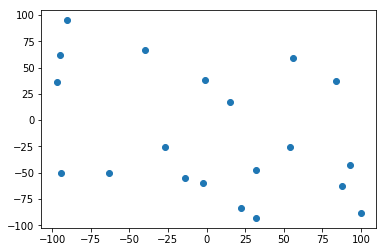

In [214]:
plt.scatter(latitudes, longitude)

In [215]:
cars_number = 4

## input: the latitudes and longitude of some some points, and the number `k` of cars will travel for this. Please given